In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
data = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28296 entries, 0 to 28295
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28296 non-null  int64  
 1   type            28296 non-null  object 
 2   amount          28296 non-null  float64
 3   nameOrig        28296 non-null  object 
 4   oldbalanceOrg   28296 non-null  float64
 5   newbalanceOrig  28296 non-null  float64
 6   nameDest        28296 non-null  object 
 7   oldbalanceDest  28296 non-null  float64
 8   newbalanceDest  28296 non-null  float64
 9   isFraud         28296 non-null  float64
 10  isFlaggedFraud  28296 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.6+ MB


In [ ]:
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,28296.000000,2.829600e+04,2.829600e+04,2.829600e+04,2.829600e+04,2.829600e+04,28296.000000,28296.0
mean,6.508199,1.357431e+05,7.667297e+05,7.823827e+05,8.484026e+05,1.191347e+06,0.002969,0.0
std,2.291113,3.013217e+05,2.126156e+06,2.166648e+06,2.513911e+06,3.106488e+06,0.054405,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,6.000000,5.966463e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,1.950196e+04,1.964727e+04,3.685915e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.601118e+05,1.386889e+05,1.407674e+05,3.655721e+05,6.675980e+05,0.000000,0.0
max,8.000000,1.000000e+07,2.235231e+07,2.246600e+07,2.495524e+07,2.878359e+07,1.000000,0.0


In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 1
Float variables: 7


<Axes: xlabel='type', ylabel='count'>

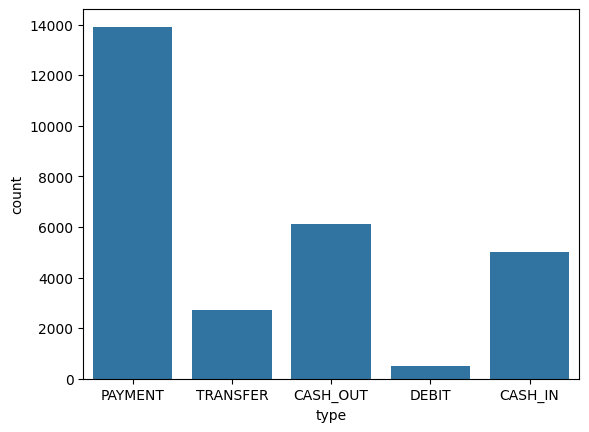

In [ ]:
sns.countplot(x='type', data=data)


<Axes: xlabel='type', ylabel='amount'>

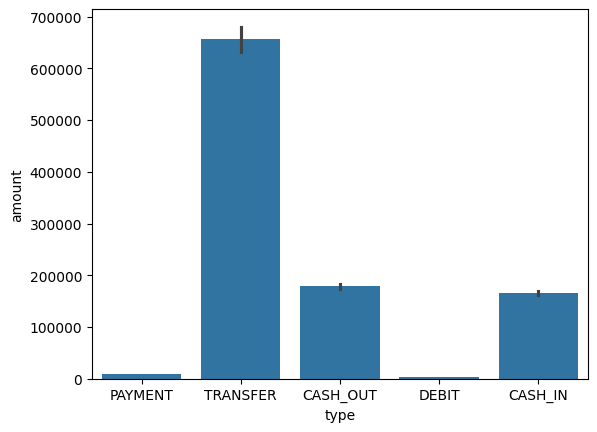

In [ ]:
sns.barplot(x='type', y='amount', data=data)


In [ ]:
data['isFraud'].value_counts()


0.0    28212
1.0       84
Name: isFraud, dtype: int64

<ipython-input-54-d1bba932735e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

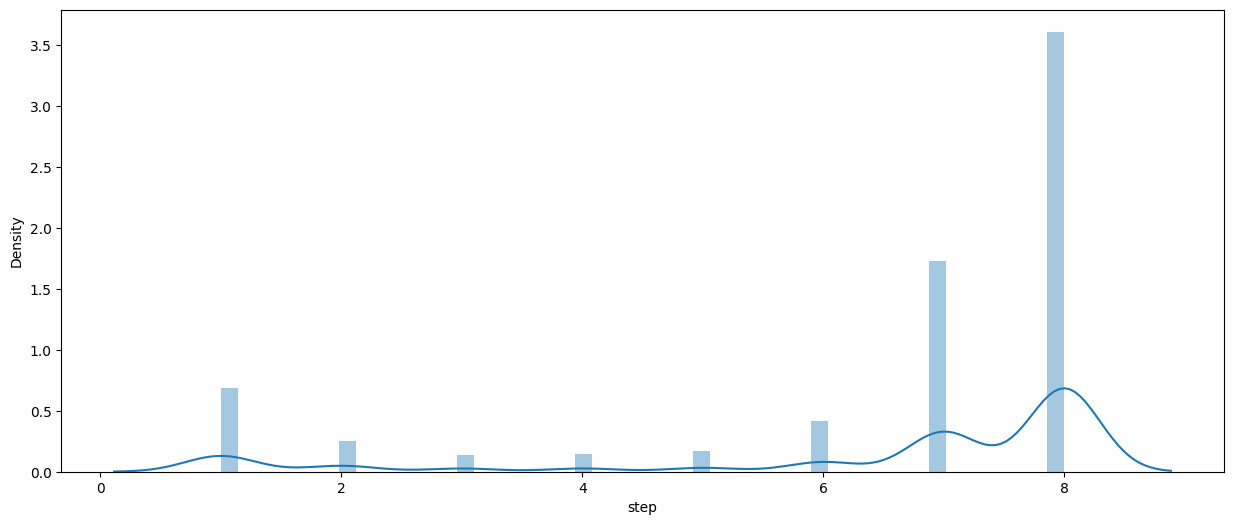

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)


<ipython-input-55-b69deaa7993a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


<Axes: >

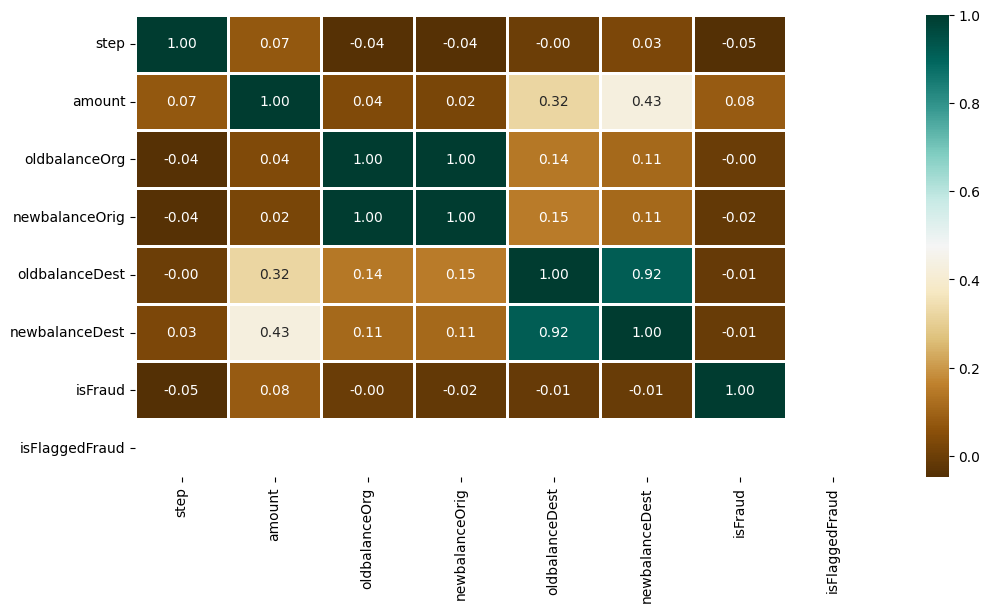

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)


In [ ]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0,0,1,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']


In [ ]:
X.shape, y.shape


((28296, 11), (28296,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


In [ ]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
dtype: int64
step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
dtype: int64


In [ ]:
data


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28291,8,CASH_OUT,78635.42,C1046801601,0.0,0.00,C766681183,17277864.84,17356500.26,0.0,0.0
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,0.0,0.0
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,0.0,0.0
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,0.0,0.0


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [ ]:
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
28291,False,False,False,False,False,False,False,False,False,False,False
28292,False,False,False,False,False,False,False,False,False,False,False
28293,False,False,False,False,False,False,False,False,False,False,False
28294,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
models = [LogisticRegression(), XGBClassifier(),
		SVC(kernel='rbf', probability=True),
		RandomForestClassifier(n_estimators=7,
								criterion='entropy',
								random_state=7)]

for i in range(len(models)):
	models[i].fit(X_train, y_train)
	print(f'{models[i]} : ')

	train_preds = models[i].predict_proba(X_train)[:, 1]
	print('Training Accuracy : ', ras(y_train, train_preds))

	y_preds = models[i].predict_proba(X_test)[:, 1]
	print('Validation Accuracy : ', ras(y_test, y_preds))
	print()


LogisticRegression() : 
Training Accuracy :  0.8980723961803242
Validation Accuracy :  0.9248010714567083

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.9990414664250638

SVC(probability=True) : 
Training Accuracy :  0.8818059071729958

[[8462    0]
 [   9   18]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8462
         1.0       1.00      0.67      0.80        27

    accuracy                           1.00      8489
   macro avg       1.00      0.83      0.90      8489
weighted avg       1.00      1.00      1.00      8489



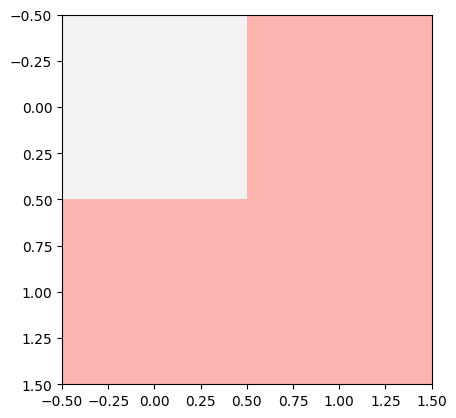

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

# Assuming models[1] is your model object
predicted_labels = models[1].predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
print(conf_matrix)
print(classification_report(y_test, predicted_labels))
# Optionally, you can display the confusion matrix using matplotlib
import matplotlib.pyplot as plt
plt.imshow(conf_matrix, cmap='Pastel1', interpolation='None')
plt.show()

